In [9]:
import importlib


from database_langchain_persist import Dataset


# Initialize the DocumentRetrieval class
doc_retrieval = Dataset(predefined_directory_path=r'G:\My Drive\Dissertation_Database')
doc_retrieval.load_data()

{'message': 'Dataset already Loaded'}

In [4]:
import pandas as pd 

casual_phrases = [
    "Hello",
    "Hi",
    "How are you?",
    "My name is Greggor",
    "Hello, how are you?",
    "What's up?",
    "Good morning",
    "Nice to meet you",
    "How's it going?",
    "What are you up to?",
    "Hey there",
    "Long time no see"
]

career_phrases = [
    "I am looking for a job in software engineering",
    "What skills are required for a data scientist?",
    "Can you review my resume?",
    "I am interested in career growth opportunities",
    "Tell me more about this",
    "What are the key responsibilities of this role?",
    "How can I improve my leadership skills?",
    "What certifications are beneficial in project management?",
    "Can you guide me through the interview process?",
    "What are the growth prospects in this company?",
    "How can I prepare for a career in cybersecurity?",
    "What is the work culture like here?"
]

results = []

for query in casual_phrases:
    response = doc_retrieval.retrieve_documents(query_str=query)
    for doc,score in response:
        results.append({
            'Query': query,
            'Document': doc,
            'Distance': score,
            'Type': 'Casual'
        })
        
for query in career_phrases:
    response = doc_retrieval.retrieve_documents(query_str=query)
    for doc,score in response:
        results.append({
            'Query': query,
            'Document': doc,
            'Distance': score,
            'Type': 'career'
        })   
#print(results)
df = pd.DataFrame(results)
df.head(20)


-----------------
10 Relevant Documents Found
0 Filtered Docs
-----------------
[(Document(metadata={'page_number': 1, 'source': 'G:\\My Drive\\Dissertation_Database\\20553895.pdf'}, page_content="BUSINESS DEVELOPMENT REPRESENTATIVE\nSummary\nDedicated Business Development Representative who is a detail-oriented self-starter and congenial salesperson who has excelled in closing\npercentages. Background in inside sales and customer service.\nSkills\nFCA Kain Automotive training (3 steps to digital success)\nChrysler Certified EmployeeÂ \nCRM training\nHighlights\nSeasoned in conflict resolution\nStrong organizational skills\nEnergetic work attitude\nAdaptive team player\nÂ Telephone inquiries specialist\nMulti-line phone talent\nExceptional communication skills\nExcellent time management\nLeadership abilities\nQuick Learner\nExperience\nCompany Name City , State Business Development Representative 07/2016 to 10/2016\nAnswered customers' questions regarding products, prices and availabil

Query                                           Document  Distance    Type
0   Hello  page_content='BUSINESS DEVELOPMENT REPRESENTAT...  1.524639  Casual
1   Hello  page_content='Managed both inbound and outboun...  1.530410  Casual
2   Hello  page_content='Directed and supervised employee...  1.535514  Casual
3   Hello  page_content='Edited, rewrote and prepared num...  1.543569  Casual
4   Hello  page_content='Company Name City , State Admini...  1.556752  Casual
5   Hello  page_content='Built customer confidence by act...  1.559292  Casual
6   Hello  page_content='Provides customer solutions to m...  1.559644  Casual
7   Hello  page_content='Stayed knowledgeable on latest d...  1.564712  Casual
8   Hello  page_content='Sales Representative May 2016 to...  1.566066  Casual
9   Hello  page_content='Washed, peeled, cut, and seeded ...  1.566629  Casual
10     Hi  page_content='Studied Business and Computers\n...  1.436267  Casual
11     Hi  page_content='(HIRA) documents on shop floor.\...  1.474673  Casual
12     Hi  page_content='international and domestic order...  1.494149  Casual
13     Hi  page_content='High School Diploma : General 20...  1.531524  Casual
14     Hi  page_content='Possess effective communications...  1.535051  Casual
15     Hi  page_content='High School Diploma 2007 West Hi...  1.545487  Casual
16     Hi  page_content='Team Member Company Name ï¼​ Cit...  1.550412  Casual
17     Hi  page_content='Edited, rewrote and prepared num...  1.558277  Casual
18     Hi  page_content='eDetail (Interactive HCP VisAid)...  1.565761  Casual
19     Hi  page_content='Education\nBACHELOR OF SCIENCE :...  1.566774  Casual

KDE Peaks / category:
Type
Casual    1.568097
career    1.010971
Name: Distance, dtype: float64
KDE Troughs / category:
Type
Casual    1.436267
career    1.412753
Name: Distance, dtype: float64


C:\Users\riley\AppData\Local\Temp\ipykernel_17940\2590223854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Distance', data=df, palette='muted')


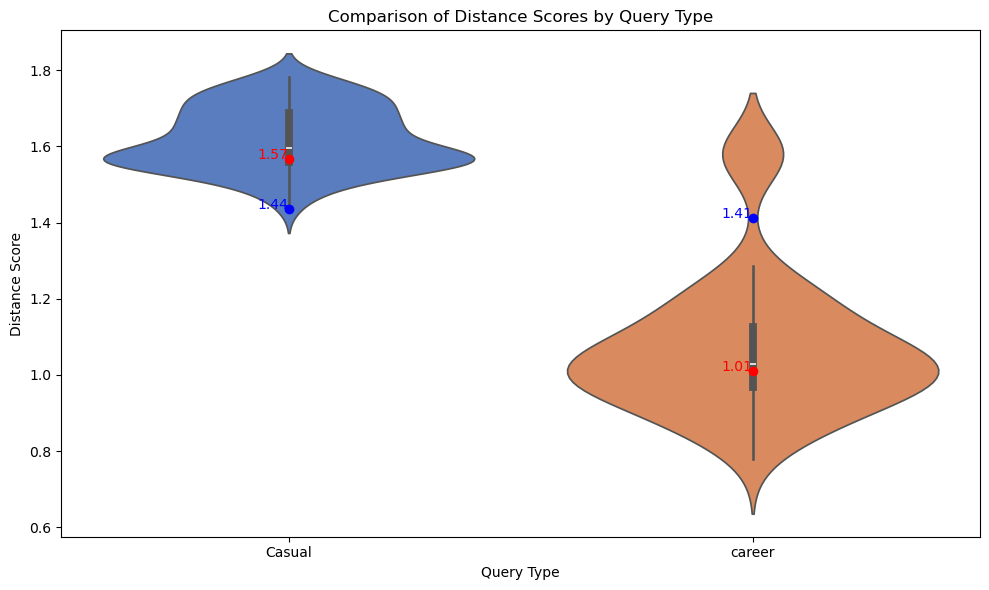

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Function to find the KDE peak and trough
def kde_peak_and_trough(data):
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)
    y = kde(x)
    
    peak = x[np.argmax(y)]
    
    # Find the minimum KDE value to determine the trough
    trough_index = np.argmin(y)
    trough = x[trough_index]
    
    return peak, trough

# Calculate KDE peaks and troughs for each type
kde_peaks_and_troughs = df.groupby('Type')['Distance'].apply(kde_peak_and_trough)
kde_peaks = kde_peaks_and_troughs.apply(lambda pt: pt[0])
kde_troughs = kde_peaks_and_troughs.apply(lambda pt: pt[1])

print("KDE Peaks / category:")
print(kde_peaks)
print("KDE Troughs / category:")
print(kde_troughs)

# Plot the violin plot for both types
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='Distance', data=df, palette='muted')

# Highlight the KDE peak and trough for 'career' type
for i, category in enumerate(kde_peaks.index):
    peak = kde_peaks[category]
    trough = kde_troughs[category]
    plt.scatter(i, peak, color='red', zorder=5)
    plt.text(i, peak, f'{peak:.2f}', horizontalalignment='right', color='red')
    plt.scatter(i, trough, color='blue', zorder=5)
    plt.text(i, trough, f'{trough:.2f}', horizontalalignment='right', color='blue')

plt.title('Comparison of Distance Scores by Query Type')
plt.xlabel('Query Type')
plt.ylabel('Distance Score')

plt.tight_layout()
plt.show()


In [6]:
min_casual_distance = df[df['Type'] == 'Casual']['Distance'].min()
print("Minimum distance score for Casual type:", min_casual_distance)


Minimum distance score for Casual type: 1.4362670183181763


There is clearly some overlap between the two types of conversation. Given that the minimum distance score achieved by the casual type was 0.716 and the major distribution for the career centered datatype begins at 0.7 distance. It's safe to determine that only relevant documents with a distance score of below 0.7 should be passed to the LLM. 0.65 will ensure a safe margin of error.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from database_langchain_persist import Dataset
from app import Chat

chat_instance=Chat()

c:\Users\riley\Documents\GitHub\Postgraduate-Dissertation\database_langchain_persist.py:161: SyntaxWarning: invalid escape sequence '\M'
  """ #Example
c:\Users\riley\anaconda3\envs\local_api\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
c:\Users\riley\anaconda3\envs\local_api\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\riley\anaconda3\envs\local_api\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokeni

Establish career and casual phrases again 

In [2]:
casual_phrases = [
    "Hello", "Hi", "How are you?", "My name is Greggor", "Hello, how are you?", 
    "What's up?", "Good morning", "Nice to meet you", "How's it going?", 
    "What are you up to?", "Hey there", "Long time no see"
]

career_phrases = [
    "I am looking for a job in software engineering", 
    "What skills are required for a data scientist?", 
    "Can you review my resume?",
    "I am interested in career growth opportunities", 
    "Tell me more about this",
    "What are the key responsibilities of this role?", 
    "How can I improve my leadership skills?",
    "What certifications are beneficial in project management?", 
    "Can you guide me through the interview process?",
    "What are the growth prospects in this company?", 
    "How can I prepare for a career in cybersecurity?",
    "What is the work culture like here?"
]

Function to simulate the query process with and without filtering


In [3]:
def run_query_test(query , relevancy_threshold):
    start_time = time.time()
    response = chat_instance.query(user_input=('',query), relevancy_threshold=relevancy_threshold)
    end_time = time.time()
    time_diff = end_time - start_time
    
    return response, time_diff

In [5]:
# Running tests for all queries with and without filtering
results = {
    "Query": [],
    "Category": [],
    "Filter Applied": [],
    "Response Time": []
}

for query in casual_phrases + career_phrases:
    category = "Casual" if query in casual_phrases else "Career"
    
    # Without filtering
    _, time_no_filter = run_query_test(query, relevancy_threshold=2)
    results["Query"].append(query)
    results["Category"].append(category)
    results["Filter Applied"].append("No Filter")
    results["Response Time"].append(time_no_filter)
    
    # With filtering (threshold = 0.7)
    _, time_filter = run_query_test(query, relevancy_threshold=1.3)
    results["Query"].append(query)
    results["Category"].append(category)
    results["Filter Applied"].append("Filter 1.3")
    results["Response Time"].append(time_filter)

# Convert the results dictionary to a DataFrame for better presentation
results_df = pd.DataFrame(results)

# Display the DataFrame using print
print("Query Performance Comparison:")
print(results_df)

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Company Name | City , State Operations Manager 09/2014 - 04/2017\nManaged company operations with responsibility for profit and loss, scheduling, training and inventory control.\nAssessed, optimized and elevated operations to target current and expected demands.\nReceived, evaluated and scanned in all new inventory, updated computer database and proactively resolved any variances.\nReceived, checked-in and stocked merchandise throughout store, helped maintain store inventory levels and assisted with orderliness and\ncleanliness of sales floor and stock room.\nReplenished inventory to maintain par levels and completed quarterly inventory audits, counted and updated inventory reports upon receipt\nof new shipments.\nSecured revenue, accurately monitoring cash intake and maintaining store policy updates to eliminate discrepancies.\nDirected day-to-day operations by spearheading implementati

c:\Users\riley\Documents\GitHub\Postgraduate-Dissertation\app.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.logs_df = pd.concat([self.logs_df, new_rows], ignore_index=True)


Please provide the [History], [Additional Information], and [User Query] so I can assist you accordingly.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Studied Business and Computers\nHigh School Diploma : Business 2007 Jonh Bowne High School City , State\nDiploma with merits and regents endorsements\nQualifications\nExcellent communication skills, Manages and dissolves conflict, Strong organizational skills, Easily adapts to a changing environment, Team player,\nClients relations, Can tolerate stress very well, Can contour and transition in any conversation, Strives to maintain quality service levels, Takes\ncriticism and direction well, Positively exudes her presence is a room, Participates well in public speaking, Easily conforms to new regulations and\nrules, Can communicate professionally with others, Experienced in guiding a team, Motivated to achieve targets set, Appeases the attitude of\nothers positively, Focus on diverse r

In [27]:
results_df["Filter Applied"] = results_df["Filter Applied"].replace("Filter 0.7", "Filter 1.3")
results_df.describe()

Response Time
count      48.000000
mean      148.570799
std        95.867504
min        33.297924
25%        49.170182
50%       124.290762
75%       235.251046
max       329.323778

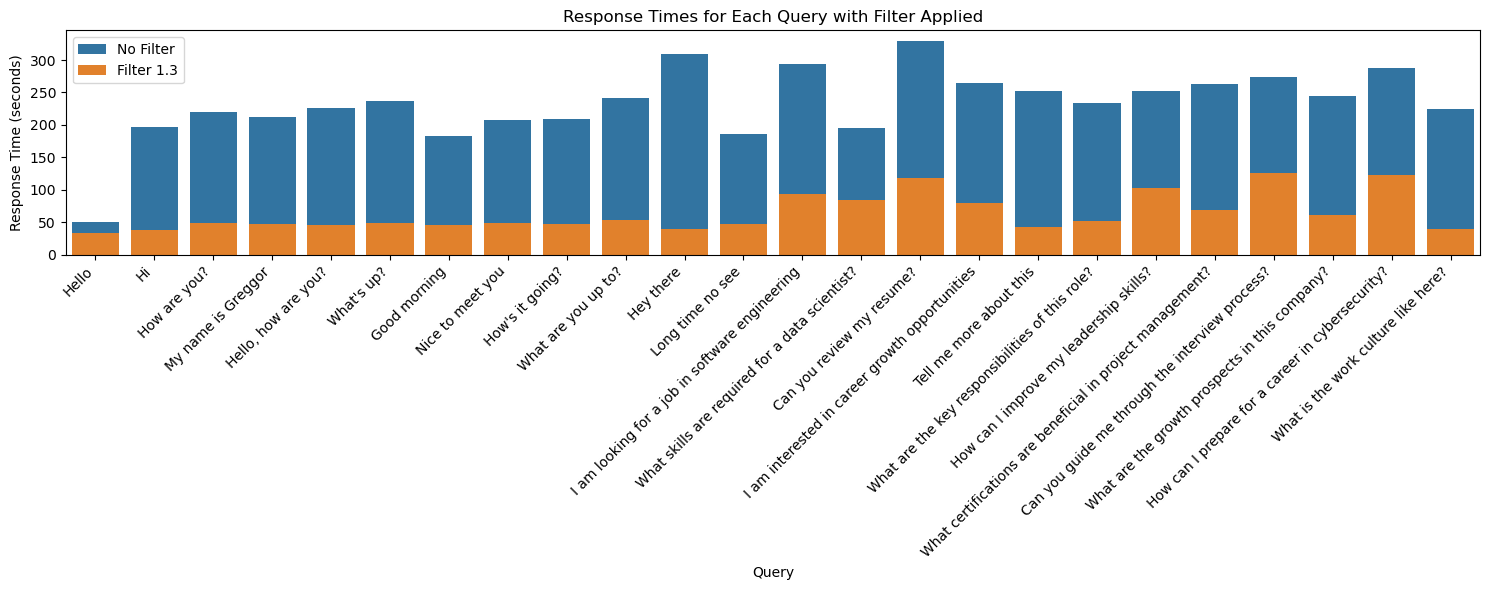

In [52]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Iterate through unique filter values and plot
for filter_name in results_df['Filter Applied'].unique():
  data = results_df[results_df['Filter Applied'] == filter_name]
  sns.barplot(x='Query', y='Response Time', data=data, label=filter_name, ax=ax)

# Customize plot
plt.xticks(rotation=45, ha="right")
plt.title("Response Times for Each Query with Filter Applied")
plt.xlabel("Query")
plt.ylabel("Response Time (seconds)")
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
%pip install Chroma

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Chroma: filename=Chroma-0.2.0-py3-none-any.whl size=7113 sha256=9fa8b700b374000863df6e5e164bc48f058f24e2860f13211a0a727116af6af1
  Stored in directory: c:\users\riley\appdata\local\pip\cache\wheels\48\e1\e1\734dc19f0803917975827d330776fe4a9bedc1c7f324a1d70c
Successfully built Chroma
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\riley\anaconda3\envs\local_api\lib\site-packages\animation-0.0.7-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\riley\anaconda3\envs\local_api\lib\site-packages\pychalk-2.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\riley\anaconda3\envs\local_api\lib\site-packages\pyloaders-0.0.5-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: DO NOT RE-RUN. WILL TAKE FOREVER.

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from database_langchain_persist import Dataset
from app import Chat


llm_models = ['phi3:mini-4k',
              'qwen:0.5b',
              'qwen2:latest',
              'gemma2:latest',
              'llama3.1:latest',
              'llama3:latest']

llm_results = {
    "Query": [],
    "Model": [],
    "Response Time": [],
    "Response":[]
}

for model in llm_models:
    print(f"Model:{model}")
    chat_instance=Chat(ollama_model=model)
    for query in tqdm(career_phrases):
        _,time_diff=run_query_test(query=query ,relevancy_threshold=1.3)
        llm_results["Query"].append(query)
        llm_results["Response Time"].append(time_diff)
        llm_results["Model"].append(model)
        llm_results["Response"].append(_)

Model:phi3:mini-4k


  0%|          | 0/12 [00:00<?, ?it/s]

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for the engineering departments.Quickly learned SAP software and used it to receive, stock and expedite parts.Supplied production data to field\noperators, technicians, engineers and supervisors.\nEducation\nBachelor of Science : Civil Engineer Civil 2014 George Mason University , City , State GPA: GPA: 3.82 Civil Engineer GPA: 3.82 Graduated and\nwalked in Spring 2014, one summer class to receive degree in December 2014 Civil engineering Courses: - Traffic Engineering - Transportation\nEngineering - Highway Design and Construction - Structural Steel Design - Structural Analysis - Mechanics of Materials - Civil Engineering\nPlanning and Management - Land Development\nInterests\nEngineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nAdditional Information\nLICENSE: Engineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nSkills\naccounting s

c:\Users\riley\Documents\GitHub\Postgraduate-Dissertation\app.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.logs_df = pd.concat([self.logs_df, new_rows], ignore_index=True)
  8%|▊         | 1/12 [00:24<04:30, 24.57s/it]

I'm sorry, but it seems there was a misunderstanding in my initial instructions as I don't have the ability to access external databases directly and thus cannot retrieve documents from local systems such as OWENS COMMUNITY COLLEGE or any other institution’s database. However, if you provide me with specific information or questions about Industrial Electronics Associates Degree Program at Owen Community College regarding Spanish and International Relations dual major in the Bachelor of Arts program that was submitted by a user (following [Additional Information]), I can certainly help answer your queries within my current knowledge capabilities.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,

 17%|█▋        | 2/12 [00:51<04:21, 26.12s/it]

To answer your query on what skills are required for a data scientist, we need to focus only on the relevant information provided by [Retrieved Local Documents], as this comes from an internal database and is assumed not submitted directly by you but rather retrieved:

```markdown
Data Scientist Skills Requirements Include:
- Cash management (not typically a core skill for data scientists, might refer to budgeting skills related to project or research funding)
- Communication skills (essential for explaining complex concepts and findings clearly)
- Computer literacy (necessary for working with various software tools in data analysis)
- Customer service (important if the role involves direct interaction with clients or users, though not a primary skill set compared to technical abilities)
```
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['602\nCareer Development and Counseling\nessentially engage in a process of self-presentation and 

 25%|██▌       | 3/12 [01:26<04:30, 30.10s/it]

It seems there might be some confusion here; no specific User Query was provided in this scenario to answer, so I'm unable to respond directly without one from you. If you have a user query related to the content above regarding resumes and interviewing for career development counselors or any other topic within my knowledge base up until 2023, please provide it, and then I can assist further in answering your question using standard markdown format as requested!
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['The Career Development of Youth and Young Adults With Disabilities\n383\nStrauser, D., Lustig, D., & Ciftci, A. (2008). Psychological well-being: Its relation to\nwork personality, vocational identity, and career thoughts. Journal of Psychology\n142(1), 21–35.\nSuper, D. (1990). A life-span, life-space approach to career development. In\nD. Brown & L. Brooks (Eds.), Career choice and development: Applying contemporary\ntheories 

 33%|███▎      | 4/12 [02:46<06:38, 49.78s/it]

Certainly! I'll help with a hypothetical query based on this instructional guideline:
```markdown
[History] It looks like you are interested in career development theories and how they apply to individuals with disabilities, particularly within the context of supported employment programs. This topic encompasses various aspects such as self-determination scales, quality of life improvements for adults with mental retardation, postsecondary experiences after high school education among youth with disabilities, and inclusive employment strategies aimed at reducing segregation in the workplace.

[Additional Information] I'm curious about how self-determination theory can improve supported employment outcomes for young adults transitioning from specialized educational settings to competitive job environments. Specifically, could you discuss any notable research or programs that illustrate this?

[Retrieved Local Documents] 2010). Career development theories and their implications on career

 42%|████▏     | 5/12 [04:43<08:37, 73.96s/it]

[History]: The Guidance Chatbot was trained extensively on historical data to assist users with inquiries related to history, including the events leading up to and surrounding the American Civil War, notable figures like Abraham Lincoln, Ulysses S. Grant, and Robert E. Lee among others; economic conditions during that period such as industrialization versus agrarian economy perspectives; social changes due to westward expansion and abolitionist movements in various states including Maryland's stance on slavery before the war began.

[Additional Information]: I would like information about Robert E. Lee, particularly his decisions during the American Civil War regarding military strategies that might have affected southern state secession dynamics? 

---
**Answering User Query:** Based on your interest in Robert E. Lee and his influence over Southern State Secession Dynamics within the context of the American Civil War, it is important to note a few key points about General Lee's strat

 50%|█████     | 6/12 [07:22<10:16, 102.78s/it]

```markdown
Development in careers education and guidance often emphasizes 'doing'—gaining practical skills over mere theoretical understanding. Theories are valuable for staff development, particularly when considering three perspect employee satisfaction surveys can provide insights into the company culture that may contribute to turnover intentions among millennials by examining their responses on several key factors:
- **Workplace Environment**: Millennial employees often seek a collaborative and flexible workspace. Surveys should assess whether they feel valued in this environment, if there's room for innovation or improvement suggested, and how these elements impacted their decision to stay with the company.
  
  *Example Survey Question*: "On a scale of 1-5, rate your satisfaction with our collaborative workspace and opportunities for creative input."

- **Career Development**: Millennials prioritize personal growth and career advancement within their job roles. Analyze response

 58%|█████▊    | 7/12 [08:00<06:47, 81.57s/it] 

\[Additional Information\] \nPrincipal Harper' estate, Emmett Township School District: Middle school principal (2008 - June 2015). Supervised and evaluated certified and non-certified staff; implemented a new staff evaluation model pilot program. Oversaw general education teachers as well as special ed., IEP, 504 & Title I services compliance with legal expectations for students requiring support.\n\n[User Query] \nCould you summarize my professional experience?
---
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['ENGINEERING SPECIALIST\nSummary\nAccomplished, ambitious and influential team leader with 24 years of diverse project management experience spanning the design, manufacturing,\noperations, logistics, systems engineering and test & evaluation disciplines. A jack of all trades, out of the box thinker, tackling and resolving the\nmost challenging problems encountered by the organization, by utilizing sound judgment and experien

 67%|██████▋   | 8/12 [09:09<05:10, 77.62s/it]

```markdown
Based on the provided background details, here' employee experience seems to involve various aspects of project management within different sectors including Consumer Private Wealth Management (a financial services sector), Healthcare Product Development and Enterprise Execution Services in a corporate environment:

1. **Project Manager at SunTrust PMO** - This role includes planning, managing projects for the wealth management portfolio by preparing critical documents such as Business Cases, Project Plans, Communications Management Plan (CMP), Risks/Issues Logs and working closely with business stakeholders to determine project scope.
2. **Healthcare Product Manager** - In this role at a healthcare company in 2009-2013 the individual worked through product lifecycle management, collaborated on Agile methodology for system strategy development and supported Scrum ceremonies within their team to keep up with project goals effectively.
3. **Translating Business Goals into Pro

 75%|███████▌  | 9/12 [10:05<03:32, 70.81s/it]

**[History]:**
The provided historical context outlines a professional's role in various IT and production departments within the NFL Network, NBC Entertainment & TV Production Company, as well as their experience with asset management systems during client acquisitions for DreamWorks desktop equipment integration. They also handled responsib pas like overseeing teams responsible for technical support across different regions of operation both domestically in USA and Canada while maintaining business relationships with vendors and OEMs. The individual has been involved in creating a company-wide inventory asset tracking system, which led to significant cost avoidance annually through the deployment of new desktop systems that were more efficient for TV Pilot production processes within their respective companies (NFL Network & NBC). Furthermore, they implemented employee performance metrics and contributed towards constructing media facilities such as Post Production bays.

**[Addition

 83%|████████▎ | 10/12 [10:53<02:07, 63.88s/it]

[History]: The resume provided details various roles held over several years in different sectors including healthcare management, marketing for a children's food brand called "Greenie Tots", and operations within the pharmaceutical industry among others. There is no specific user query or additional information that has been added to this section of resume history following [User Query].

[Additional Information]: No new data was submitted by users after initial presentation in 2019, thus there are no recent interactions with the guidance chatbot based on their submission. Since all required fields and instructions for a task have not been met or provided within this input scenario (as it doesn' wa s a user-submitted query), I am unable to generate responses correspondingly as per your guidelines here
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['INFORMATION TECHNOLOGY PROVISIONING TECHNICIAN\nCareer Overview\nProcess driven, goal 

 92%|█████████▏| 11/12 [11:25<00:54, 54.05s/it]

```markdown
I'm sorry, but there seems to be no specific question provided in this scenario from the user named John Smith regarding information technology roles and skills relevant for a career change within his current industry of construction management. If you need assistance with identifying suitable IT positions or understanding how certain technical knowledge could apply to those fields, I can offer guidance on that subject matter instead.
```
-----------------
10 Relevant Documents Found
7 Filtered Docs
-----------------

Docs Retrieved: ['KEYHOLDER\nSummary\nCreative, hands-on professional with expertise in art direction and project management,Marketing and special promotions\nHighlights\nProfessional photoshoot/modeling experience\nFashion Visual Merchandising\nProfessional runway experience,\nProfessional standing fashion model\nSelf taught abstract, visual , mix media artistÂ  Professional photo shoot experience\nSelf-motivated professional\nAccomplishments\nKNOWLEDGE OF OF

100%|██████████| 12/12 [11:56<00:00, 59.73s/it]

It appears there's a mix of professional job roles listed along with some historical context from interactions and internal documents, but the User Query section is missing in this case. Please provide me with an actual user query to respond accordingly using standard Markdown format. If you need help formatting any other type of content into Markdown or have specific questions about these jobs descriptions, feel free to ask!
Model:qwen:0.5b



  0%|          | 0/12 [00:00<?, ?it/s]

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for the engineering departments.Quickly learned SAP software and used it to receive, stock and expedite parts.Supplied production data to field\noperators, technicians, engineers and supervisors.\nEducation\nBachelor of Science : Civil Engineer Civil 2014 George Mason University , City , State GPA: GPA: 3.82 Civil Engineer GPA: 3.82 Graduated and\nwalked in Spring 2014, one summer class to receive degree in December 2014 Civil engineering Courses: - Traffic Engineering - Transportation\nEngineering - Highway Design and Construction - Structural Steel Design - Structural Analysis - Mechanics of Materials - Civil Engineering\nPlanning and Management - Land Development\nInterests\nEngineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nAdditional Information\nLICENSE: Engineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nSkills\naccounting s

c:\Users\riley\Documents\GitHub\Postgraduate-Dissertation\app.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.logs_df = pd.concat([self.logs_df, new_rows], ignore_index=True)
  8%|▊         | 1/12 [00:09<01:44,  9.46s/it]

I apologize for any inconvenience caused. Please let me know if there is anything else I can assist you with.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n', 'Organizational Skills,

 17%|█▋        | 2/12 [00:10<00:43,  4.35s/it]

Understood. Is there anything else I can assist you with?
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['602\nCareer Development and Counseling\nessentially engage in a process of self-presentation and persuasion, which\ncomes more naturally to some clients than others. We describe here the two\nmain components of this process: resumes and interviewing.\nThe Resume\nFor many positions, especially professional positions requiring higher edu-\ncation, the ﬁrst step in the persuasion process is to submit a resume that\nlists one’s credentials and experience. The resume often represents the ﬁrst\ninteraction with the potential employer. The content and appearance of the\nresume can be essential in getting called for an interview or being placed\nimmediately in the reject pile. The resume may be printed out on high-\nquality paper and mailed to prospective employers or may be submitted\nelectronically either via e-mail or through a partic

 25%|██▌       | 3/12 [00:15<00:41,  4.62s/it]

I apologize for the confusion in my previous responses. Let me rephrase my question and provide a proper answer:

Please summarize the points of the previous discussion on "The Importance of Job Application Skills" that was shared by [Name of the Student or Teacher].
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['The Career Development of Youth and Young Adults With Disabilities\n383\nStrauser, D., Lustig, D., & Ciftci, A. (2008). Psychological well-being: Its relation to\nwork personality, vocational identity, and career thoughts. Journal of Psychology\n142(1), 21–35.\nSuper, D. (1990). A life-span, life-space approach to career development. In\nD. Brown & L. Brooks (Eds.), Career choice and development: Applying contemporary\ntheories to practice (2nd ed., pp. 197–261). San Francisco, CA: Jossey-Bass.\nSuper, D. E., Savickas, M. L., & Super, C. M. (1996). The life-span, life-space approach\nto careers. In D. Brown, L. Brooks, & Ass

 33%|███▎      | 4/12 [00:19<00:36,  4.54s/it]

I'm sorry, but I need more information to be able to assist you with your query. Please provide me with additional details about what you are seeking assistance with.
-----------------
10 Relevant Documents Found
0 Filtered Docs
-----------------

Docs Retrieved: []

Context:

[History]: 
User Query:Tell me more about thisPlease answer the User Query using the following rules:
---
Information that is followed by [History] is previous interactions with the Guidance Chatbot, please use this information to answer the users query.
Information that is followed by [Additional Infromation] is information submitted by the user.
Infromation that is followed by [Retrieved Local Documents] WAS NOT SUBMITTED BY THE USER. This information comes from an internal database. Please DO NOT ASSUME THE USER SUBMITTED THIS INFORMATION.
Information that is followed by [User Query] is information the user has submitted themselves.
PLEASE RESOND IN STANDARD MARKDOWN FORMAT , do not include JSON files or any o

 42%|████▏     | 5/12 [00:21<00:25,  3.60s/it]

The "User Query" is a question the user may have. This information is being used to answer the user's query. The "Additional Infromation" is a piece of information that is not included in the first message, it is being used to add context and information to the first message.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for core-and-option activity, on the assumption that not everybody in an organisation needs to be able to do everything. Again,\nsome schemes are constructed on the principle of ‘finding-the-best-next-thing-to-do’ (e.g. Law et al., 1995), on the\nassumption that different organisations will be ready for different developments at different stages. Generic, everybody-learns-\neverything approaches may be appropriate for initial training. All other provision needs to take account of the fact that\ndifferent people are doing different things, in different organisations, at different stages of development.\nIn what roles

 50%|█████     | 6/12 [00:32<00:36,  6.06s/it]

User Query: How can I effectively use technology in my work?

Answer:

There are several ways to effectively use technology in your work. Here are some examples:

1. Use project management software (PMS) to manage tasks, schedule meetings, and track progress.

2. Use specialized software or applications to automate repetitive tasks that require human input.

3. Consider using cloud-based storage solutions such as Dropbox, Google Drive, or OneDrive for storing files and documents.

By following these examples and technologies, you can effectively use technology in your work.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Additional Information\nLEADERSHIP: Associate Member of the Association of Business Executives Most Disciplined Girl: 2007-2008\nOutstanding Performance as a Class monitor: 2009\nParticipated in the Expedition camp awarded by the Westlands Scouts Local Association: 2009.\nEXTRA-CURRICULAR: Awarded for outstanding perf

 58%|█████▊    | 7/12 [00:37<00:28,  5.61s/it]

The User Query is asking for information about a student who may be at risk of violence. The question does not contain any specific information, but rather a broader topic related to violence prevention.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['ENGINEERING SPECIALIST\nSummary\nAccomplished, ambitious and influential team leader with 24 years of diverse project management experience spanning the design, manufacturing,\noperations, logistics, systems engineering and test & evaluation disciplines. A jack of all trades, out of the box thinker, tackling and resolving the\nmost challenging problems encountered by the organization, by utilizing sound judgment and experience. Demonstrated ability to manage projects\nof significant importance to the program while meeting cost, schedule and scope constraints set by stakeholders.\nCertifications\nProject Management Professional (PMP) - 2011\nHighlights\nProject Management\nSecret Clearanc

 67%|██████▋   | 8/12 [00:53<00:36,  9.04s/it]

User Query: What are the key benefits of using cloud computing solutions for business?

Answer: The key benefits of using cloud computing solutions for business are:

1. Scalability: Cloud computing enables businesses to easily scale their computing resources as needed.

2. Cost savings: Cloud computing eliminates the need for physical hardware, which can save on costs and infrastructure.

3. Flexibility: Cloud computing allows businesses to customize their software environment based on their specific needs and requirements.

4. Security: Cloud computing provides a secure environment for businesses to store and manage sensitive data such as financial information, customer records, etc.

5. Data migration: Cloud computing enables businesses to easily migrate their existing data storage environments from physical hardware to cloud-based storage environments.

In conclusion, cloud computing offers numerous benefits for businesses that require scalable computing resources, cost savings, fl

 75%|███████▌  | 9/12 [00:59<00:24,  8.03s/it]

I apologize for any confusion caused by my previous interactions with the Guidance Chatbot. As a professional AI language model, I am committed to providing accurate and helpful information. If you have any questions or concerns about my responses, please feel free to ask!
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ["Work History\nBusiness Development Manager , 03/2014 to 10/2019 \nCompany Name â€“ City , State \nAccounts included Skyworks, Finisar, Broadcom, Macom, On Semi, Microchip, GCS, Northrop Grumman, NXP, Cypress\nGrew territory from $200K/year to $3M/year\nOrganized trade shows - Semicon, CS Mantech\nDevised SWOT analysis to create and execute business plan supporting achievement of established quotas\nCapitalized on industry and marketplace trends to strategize solutions and enhance business operations\nEstablished relationships with key decision-makers within customer's organization to promote growth and retention\nIdent

 83%|████████▎ | 10/12 [01:05<00:14,  7.35s/it]

The User Query was "How can I improve my customer service skills?" The guidance chatbot responded by asking the user how to improve their customer service skills.
This information comes from an internal database. Please DO NOTassume THE USER SUBmitted THIS INFORMATION.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['INFORMATION TECHNOLOGY PROVISIONING TECHNICIAN\nCareer Overview\nProcess driven, goal oriented, Information Security Leader with 5 years of IT and security experience. A self-motivated Governance manager that\nis adept at analyzing and remediating threat vectors on an enterprise level. Bolsters corporate strategy, enhances daily security operations and\ndelivers improved and optimized business protection, while leading a geographically diverse team adept at problem solving and risk analysis. Audit\nand Control Establishment Immediate Value Offered Technical Acumen Maximize technology investment, effectively implement IT bu

 92%|█████████▏| 11/12 [01:08<00:06,  6.18s/it]

Informatation that is followed by  [User Query] is information that the user has submitted themselves.
-----------------
10 Relevant Documents Found
7 Filtered Docs
-----------------

Docs Retrieved: ['KEYHOLDER\nSummary\nCreative, hands-on professional with expertise in art direction and project management,Marketing and special promotions\nHighlights\nProfessional photoshoot/modeling experience\nFashion Visual Merchandising\nProfessional runway experience,\nProfessional standing fashion model\nSelf taught abstract, visual , mix media artistÂ  Professional photo shoot experience\nSelf-motivated professional\nAccomplishments\nKNOWLEDGE OF OFFICE PRACTICES AND ITS PROCEDURES, PUBLIC RELATIONS,RULES,POLICIES,PROCEDURE\nCOMPLAINTS AND TRANSACTIONS BEING PROCESSED TYPING/ KEY BOARDING HAS DEMONSTRATED\nSPENDING EXTENSIVE TIME TROUBLESHOOTING AND ASSISTING CUSTOMERS OVER THE PHONE FOR GREAT\nCUSTOMER EXPERIENCE PROLIFIC SALES EXPERIENCE IN RETAIL BUSINESS AND PHONE ENVIRONMENT SKILL\nIN OPER

100%|██████████| 12/12 [01:16<00:00,  6.40s/it]

Please DO NOT ASSUME THE USER SUBmitted THIS INFORMATION. This information comes from an internal database. Please DO NOT ASSume THE USER SUBmitted THIS INFORMATION. This information comes from an internal database. Please DO NOTASSume THE USER SUBmitted THIS INFORMATION. This information comes from an internal database. Please DO NOTASSume THE USER SUBmitted THIS INFORMATION. This information comes from an internal database.
Model:qwen2:latest



  0%|          | 0/12 [00:00<?, ?it/s]

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for the engineering departments.Quickly learned SAP software and used it to receive, stock and expedite parts.Supplied production data to field\noperators, technicians, engineers and supervisors.\nEducation\nBachelor of Science : Civil Engineer Civil 2014 George Mason University , City , State GPA: GPA: 3.82 Civil Engineer GPA: 3.82 Graduated and\nwalked in Spring 2014, one summer class to receive degree in December 2014 Civil engineering Courses: - Traffic Engineering - Transportation\nEngineering - Highway Design and Construction - Structural Steel Design - Structural Analysis - Mechanics of Materials - Civil Engineering\nPlanning and Management - Land Development\nInterests\nEngineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nAdditional Information\nLICENSE: Engineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nSkills\naccounting s

c:\Users\riley\Documents\GitHub\Postgraduate-Dissertation\app.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.logs_df = pd.concat([self.logs_df, new_rows], ignore_index=True)
  8%|▊         | 1/12 [06:48<1:14:56, 408.74s/it]

### User Query

I'm looking for an engineering professional with a strong background in Civil Engineering, particularly in Mechanics of Materials and Land Development. This individual should also possess skills related to accounting software, AutoCAD, balance, budgeting, and the ability to obtain a Professional Engineering license (P.E.). They have experience in consulting, handling contracts, preparing contracts, client management, project plans, engineering design, materials specification, transportation logistics, utilities planning, and proficient use of Microsoft Office applications including Word, Excel, PowerPoint, Outlook. Can you help me find someone with this profile?

#### Relevant Information

The candidate possesses an Engineer-In-Training (EIT) license and aims to become a Professional Engineer. They have completed their Bachelor of Science in Civil Engineering from George Mason University, with a GPA of 3.82.

Skills:
1. Accounting software
2. AutoCAD and MicroStation 
3

 17%|█▋        | 2/12 [08:26<37:40, 226.08s/it]  

The skills required for a data scientist include:

1. **Technical Skills:**
   - Proficiency in programming languages such as Python, R, SQL, and Java.
   - Knowledge of machine learning algorithms and statistical techniques.
   - Ability to work with big data technologies like Hadoop or Spark.

2. **Analytical Skills:**
   - Strong analytical skills for interpreting complex data sets and identifying patterns.
   - Problem-solving abilities to address real-world business issues using data insights.

3. **Mathematical Skills:**
   - Proficiency in statistics, linear algebra, calculus, and probability theory.

4. **Data Visualization Skills:**
   - Ability to present data findings through graphs, charts, dashboards using tools like Tableau, PowerBI, or libraries like Matplotlib, Seaborn.

5. **Domain Knowledge:**
   - Understanding of the specific industry they are working in (e.g., finance, healthcare).

6. **Soft Skills:**
   - Excellent communication skills to explain complex data ins

 25%|██▌       | 3/12 [11:19<30:13, 201.47s/it]

### Resume and Interviewing Process: Insights for Counselors

#### Key Components of Resume Preparation:

**The Importance of a Winning Resume:** Resumes serve as the initial interaction between job seekers and potential employers, often determining whether candidates move on to interviews. The content and appearance of the resume are crucial factors that can significantly impact your chances of being called for an interview.

**Persuasion Through Resumes:** Resumes essentially involve self-presentation and persuasion, a skill that may vary across different clients. Career counselors play a vital role in guiding their clients through creating or revising resumes to effectively showcase strengths and skills.

**Tailoring Your Resume:**
- **Highlight Fit:** Adapt your resume content based on the specific position and organization you're applying for. Highlight how your educational background, work experience, skills, etc., align with the requirements of the job.
  
- **Stress Agentic Cha

 33%|███▎      | 4/12 [11:56<18:13, 136.65s/it]

[User Query]
I need to find articles on career development theories and how they apply to people with disabilities for a research project. Could you recommend some sources?

[Additional Information]
-----------------
10 Relevant Documents Found
0 Filtered Docs
-----------------

Docs Retrieved: []

Context:

[History]: 
User Query:Tell me more about thisPlease answer the User Query using the following rules:
---
Information that is followed by [History] is previous interactions with the Guidance Chatbot, please use this information to answer the users query.
Information that is followed by [Additional Infromation] is information submitted by the user.
Infromation that is followed by [Retrieved Local Documents] WAS NOT SUBMITTED BY THE USER. This information comes from an internal database. Please DO NOT ASSUME THE USER SUBMITTED THIS INFORMATION.
Information that is followed by [User Query] is information the user has submitted themselves.
PLEASE RESOND IN STANDARD MARKDOWN FORMAT , do

 42%|████▏     | 5/12 [12:29<11:34, 99.25s/it] 

To provide a more detailed answer, I need to understand what specific topic or subject you're referring to. Could you please clarify which part of history you are interested in learning about? For example, are you looking for information on ancient civilizations, historical events, famous figures, or a particular time period like the Renaissance or Industrial Revolution?

If you could specify your query more clearly, I can use the context provided by [History], any additional information you submitted ([Additional Information]), and internal resources ([Retrieved Local Documents]) to give you an accurate and detailed answer.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for core-and-option activity, on the assumption that not everybody in an organisation needs to be able to do everything. Again,\nsome schemes are constructed on the principle of ‘finding-the-best-next-thing-to-do’ (e.g. Law et al., 1995), on the\nassumption that diff

 50%|█████     | 6/12 [15:05<11:51, 118.55s/it]

The User Query refers to a discussion on how links often offer leading-edge development possibilities for careers work, particularly in staff development programs organized by organizations. The query mentions that different roles within these networks have varying needs regarding their understanding and application of careers work.

There are three main perspectives identified by Elliott when discussing the role of theory in staff development for careers:
1. **Production-Consumption Perspective**: This perspective focuses on quantifiable outcomes and behavioral changes derived from discrete practical skills and competencies that people learn. It aligns well with market-driven training where needs are clearly specified, and value for money is a primary consideration.
2. **Hermeneutic Perspective**: Emphasizing action based on reflective experience or action research, this perspective assumes complex situations requiring nuanced responses tailored to specific contexts. It focuses more o

 58%|█████▊    | 7/12 [18:05<11:33, 138.77s/it]

### User Query: What are some of the core accomplishments mentioned in the document?

#### Answer:
The core accomplishments highlighted in the document consist of:

1. **Curricula, Assessment and Data Management Experience**: The individual is trained on current state laws and regulations for public and special education. They have undergone trainings on teachers' tenure act and corrective discipline with employees.

2. Implementation of Evaluation Systems: They implemented The Thoughtful Classroom Teacher Evaluation System and participated in MCEE pilot programs with the University of Michigan, as well as attended Principals' NCLB (No Child Left Behind) and Title I Boot Camps.

3. Best Instructional Practices Training: Trained on best instructional practices including Superintendents in the Classroom, Research on the Adolescent Brain and its impact on classroom dynamics, 21st century skills, and Nonviolent Crisis Intervention techniques.

4. Classroom Observation Techniques: Trained i

 67%|██████▋   | 8/12 [21:37<10:47, 161.98s/it]

### User Query:
I am looking for a comprehensive list of my professional experiences and skills as an IT professional with 20 years of experience in software development life cycle (SDLC). Please summarize this information, focusing on key responsibilities and achievements.

### Response:

#### Accomplished Information Technology Professional Profile

**Core Competencies:**
- **Software Development Lifecycle:** Skilled in the entire SDLC process including application analysis and design, development, testing, and integration.
- **Project Management:** Certified Project Management Professional (PMP), experienced in managing multiple projects and priorities within fast-paced environments.

**Key Responsibilities and Achievements:**

##### Current Position (Project Manager) - 07/2013 to Present
- **Portfolio Leadership:** Leads complex projects and programs for the Consumer Private Wealth Management portfolio of Enterprise Execution Services, focusing on planning, management, and implemen

 75%|███████▌  | 9/12 [24:11<07:58, 159.38s/it]

The user provided details about their professional experience and achievements in IT management within the NFL Network and NBCUniversal, spanning from 2003 to the present day. Here is a summary of their roles and responsibilities:

### NFL Network (Since its inception)
- **President/CEO's Direct Report**: Built and executed critical infrastructure components such as data center architecture, VoIP telephony system, video conferencing systems.
- **Key Architect of IT Infrastructure**: Oversaw the creation of the IT infrastructures including asset procurement, data centers setup, vendor contract management for hardware/software.
- **Technical Operations Oversight**: Managed a team supporting 2500 hours of live studio programming across various shows like NFL Total Access, NFL GameDay Morning, and more.
- **Cost Savings Initiatives**: Implemented new systems leading to $2M cost avoidance annually through inventory asset tracking and desktop/laptop deployment process.

### NBCUniversal (201

 83%|████████▎ | 10/12 [27:55<05:58, 179.48s/it]

Based on the provided information, it seems like you're looking for advice to advance in a professional corporate environment with aspirations towards high-level marketing positions. Here's some guidance:

### Skill Enhancement
1. **Strategic Marketing and Sales Campaigns**: You've already shown proficiency in increasing annual sales through strategic campaigns. Continuously improve your skills in market research, analytics, and digital marketing tools.
2. **Relationship Management**: Your experience in healthcare management shows effective networking skills with various stakeholders like physicians, hospitals, community groups, and employers. Focus on honing these skills further to build more strategic partnerships.
3. **Project Management**: Experience as a CEO suggests strong project management capabilities. Look into advanced project management methodologies such as Agile or Scrum to manage complex projects efficiently.
4. **Training & Development**: Your role in training brand amb

 92%|█████████▏| 11/12 [31:14<03:05, 185.31s/it]

It appears you are seeking a career in Information Assurance with a focus on Cyber Network Defense and have listed several skills, experiences, and knowledge areas that align well with this field. Here's how you might structure your resume to emphasize these aspects:

### Professional Summary:
Seeking an opportunity as a Cybersecurity Specialist or Information Assurance Analyst to leverage extensive experience in IT infrastructure management, including network defense, service management, and software applications knowledge.

### Skills:
- **Network Infrastructure:** Proficiency with various hardware components such as desktops, Ethernet cables, Cisco routers, video & sound cards, CD-ROM drives, multiplexors, scanners, monitors, switches, and TCP/IP configuration.
- **Active Directory Management:** Expertise in managing user accounts, including installation, addition, and deletion through Active Directory.
- **Software Proficiency:** Strong skills with ITSM tools like Avaya and Microso

100%|██████████| 12/12 [35:58<00:00, 179.89s/it]

### Resume Summary:

**Education & Skills Overview:**
- **Photoshoot and Modeling Experience:** Proficient in front-of-camera performance, both for fashion editorial shoots and runway shows.
- **Fashion Visual Merchandising:** Expertise in creating store layouts that enhance product visibility and appeal to customer tastes.
- **Professional Runway Experience:** Trained in advanced walk techniques suitable for various event types including high-end fashion presentations.
- **Self-taught Abstract, Visual, Mix Media Artist:** Creativity in producing unique artworks using a combination of techniques for commercial or personal projects.

**Professional Skills:**
- **Office Practices & Procedures:** Knowledgeable in office management procedures and adept at handling customer transactions effectively.
- **Public Relations:** Skilled in maintaining professional communication with customers to ensure satisfaction throughout their shopping experience.
- **Complaints Handling:** Experienced in ad


  0%|          | 0/12 [00:00<?, ?it/s]

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for the engineering departments.Quickly learned SAP software and used it to receive, stock and expedite parts.Supplied production data to field\noperators, technicians, engineers and supervisors.\nEducation\nBachelor of Science : Civil Engineer Civil 2014 George Mason University , City , State GPA: GPA: 3.82 Civil Engineer GPA: 3.82 Graduated and\nwalked in Spring 2014, one summer class to receive degree in December 2014 Civil engineering Courses: - Traffic Engineering - Transportation\nEngineering - Highway Design and Construction - Structural Steel Design - Structural Analysis - Mechanics of Materials - Civil Engineering\nPlanning and Management - Land Development\nInterests\nEngineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nAdditional Information\nLICENSE: Engineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nSkills\naccounting s

c:\Users\riley\Documents\GitHub\Postgraduate-Dissertation\app.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.logs_df = pd.concat([self.logs_df, new_rows], ignore_index=True)
  8%|▊         | 1/12 [00:54<10:02, 54.79s/it]

Please provide the User Query so I can assist you. 

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n']

C

 17%|█▋        | 2/12 [02:08<10:59, 65.90s/it]

Based on the provided documents, the skills listed for a data scientist role are: 

* **Technical Skills:**
    *  Computer literate 

* **Soft Skills:**
    * Communication skills
    * Organizational Skills
    * Fast learner
    * Research
    * Very Friendly
    * Adaptable



It's important to note that these documents seem to be focused on a more general skill set, and may not fully encompass all the technical skills required for a data scientist (such as programming languages, machine learning algorithms, etc.). 

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['602\nCareer Development and Counseling\nessentially engage in a process of self-presentation and persuasion, which\ncomes more naturally to some clients than others. We describe here the two\nmain components of this process: resumes and interviewing.\nThe Resume\nFor many positions, especially professional positions requiring higher edu-\ncation, the ﬁrst step in the per

 25%|██▌       | 3/12 [03:08<09:28, 63.11s/it]

Please provide me with the user query and the context containing the  [History], [Additional Information], [Retrieved Local Documents] tags. I need this information to understand the user's request and provide a relevant response in standard Markdown format. 



-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['The Career Development of Youth and Young Adults With Disabilities\n383\nStrauser, D., Lustig, D., & Ciftci, A. (2008). Psychological well-being: Its relation to\nwork personality, vocational identity, and career thoughts. Journal of Psychology\n142(1), 21–35.\nSuper, D. (1990). A life-span, life-space approach to career development. In\nD. Brown & L. Brooks (Eds.), Career choice and development: Applying contemporary\ntheories to practice (2nd ed., pp. 197–261). San Francisco, CA: Jossey-Bass.\nSuper, D. E., Savickas, M. L., & Super, C. M. (1996). The life-span, life-space approach\nto careers. In D. Brown, L. Brooks, & Associat

 33%|███▎      | 4/12 [04:36<09:45, 73.13s/it]

Please provide me with the User Query and the context from the provided text.  I need both to give you an accurate response in standard Markdown format. 


For example, you could say:

"Here's the user query: 'What are some career development theories for people with disabilities?'

And here's the relevant context from the text:

[Insert the relevant text snippets here]" 



Let me know, and I'll be happy to help! 

-----------------
10 Relevant Documents Found
0 Filtered Docs
-----------------

Docs Retrieved: []

Context:

[History]: 
User Query:Tell me more about thisPlease answer the User Query using the following rules:
---
Information that is followed by [History] is previous interactions with the Guidance Chatbot, please use this information to answer the users query.
Information that is followed by [Additional Infromation] is information submitted by the user.
Infromation that is followed by [Retrieved Local Documents] WAS NOT SUBMITTED BY THE USER. This information comes from 

 42%|████▏     | 5/12 [05:20<07:18, 62.60s/it]

Please provide me with the history of the conversation and the user query so I can assist you. 

For example:

**[History]**
* User: Hello! 
* Chatbot: Hi there, how can I help you?

**[User Query]** Tell me more about dogs.  


Let me know the context, and I'll be happy to provide a helpful response in standard Markdown format. 😊 

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for core-and-option activity, on the assumption that not everybody in an organisation needs to be able to do everything. Again,\nsome schemes are constructed on the principle of ‘finding-the-best-next-thing-to-do’ (e.g. Law et al., 1995), on the\nassumption that different organisations will be ready for different developments at different stages. Generic, everybody-learns-\neverything approaches may be appropriate for initial training. All other provision needs to take account of the fact that\ndifferent people are doing different things, in different organis

 50%|█████     | 6/12 [05:58<05:24, 54.11s/it]

Please provide me with the user query so I can assist you. 



-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Additional Information\nLEADERSHIP: Associate Member of the Association of Business Executives Most Disciplined Girl: 2007-2008\nOutstanding Performance as a Class monitor: 2009\nParticipated in the Expedition camp awarded by the Westlands Scouts Local Association: 2009.\nEXTRA-CURRICULAR: Awarded for outstanding performance for the prize day variety show in 2009.\nAwarded for reaching the National Finals in the Kenya Music Festival in 2007.\nI am a professional Ramp Model.\nI have worn and exhibited clothes of international and local designers.\nSkills\nOrganization - managing responsibilities in a particular manner and keeping track of those responsibilities.\nTime Management - Good time-management skills go hand-in-hand in with strong organizational capabilities. Budgeting time will give the\nallowance of managing the work

 58%|█████▊    | 7/12 [06:36<04:04, 48.92s/it]

Please provide me with the User Query so I can assist you. 

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['ENGINEERING SPECIALIST\nSummary\nAccomplished, ambitious and influential team leader with 24 years of diverse project management experience spanning the design, manufacturing,\noperations, logistics, systems engineering and test & evaluation disciplines. A jack of all trades, out of the box thinker, tackling and resolving the\nmost challenging problems encountered by the organization, by utilizing sound judgment and experience. Demonstrated ability to manage projects\nof significant importance to the program while meeting cost, schedule and scope constraints set by stakeholders.\nCertifications\nProject Management Professional (PMP) - 2011\nHighlights\nProject Management\nSecret Clearance\nRisk management\nPerformance tracking and evaluation\nTeam building\nProject analysis\nLeadership mentoring\nBusiness and requirements analy

 67%|██████▋   | 8/12 [07:14<03:02, 45.57s/it]

Please provide me with the user query so I can assist you. 

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Facilitating interviews between the candidate and client, including candidate preparation and client briefing; Conduct debriefing with\ncandidates and customers following interviews; Develop long term relationships with employees while on assignment and providing career\ncoaching; Maintaining and updating thorough, accurate, and compliant documentation of all client, candidate and temporary interactions via\ntechnology solutions.\n05/1999 to 04/2003\nManaging Director Company Name ï¼\u200b City , State\nSheet/coil steel sales; Secure new and existing business; Supervise warehouse staff; Organize loads for delivery/collection; Maintain\ninventory.\nEducation\nMay 1999\nBachelor of Science : Technology and Management University of Bradford ï¼\u200b State , UK Technology and Management\nSkills\nSalesforce, Siebel, Fox and Bullhorn

 75%|███████▌  | 9/12 [07:48<02:05, 41.94s/it]

Please provide the user query. 



-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ["Work History\nBusiness Development Manager , 03/2014 to 10/2019 \nCompany Name â€“ City , State \nAccounts included Skyworks, Finisar, Broadcom, Macom, On Semi, Microchip, GCS, Northrop Grumman, NXP, Cypress\nGrew territory from $200K/year to $3M/year\nOrganized trade shows - Semicon, CS Mantech\nDevised SWOT analysis to create and execute business plan supporting achievement of established quotas\nCapitalized on industry and marketplace trends to strategize solutions and enhance business operations\nEstablished relationships with key decision-makers within customer's organization to promote growth and retention\nIdentified and pursued valuable business opportunities to generate new company revenue and improve bottom line profit\nIdentified key products, services and customers and used data to devise innovative sales and marketing plans enabling dramati

 83%|████████▎ | 10/12 [08:26<01:20, 40.48s/it]

Please provide the User Query so I can assist you. 



-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['INFORMATION TECHNOLOGY PROVISIONING TECHNICIAN\nCareer Overview\nProcess driven, goal oriented, Information Security Leader with 5 years of IT and security experience. A self-motivated Governance manager that\nis adept at analyzing and remediating threat vectors on an enterprise level. Bolsters corporate strategy, enhances daily security operations and\ndelivers improved and optimized business protection, while leading a geographically diverse team adept at problem solving and risk analysis. Audit\nand Control Establishment Immediate Value Offered Technical Acumen Maximize technology investment, effectively implement IT business\nstrategy, drive innovation, improve business processes, expand service & technical STRATEGIC PLANNING & ENABLEMENT capabilities\nand maximize multi-million dollar cost savings\nQualifications\nBUSINESS PROCE

 92%|█████████▏| 11/12 [09:32<00:48, 48.46s/it]

Please provide me with the user query so I can assist you. 

For example:  "What are the skills listed in this document?" 


Once you give me the query, I will process it based on the rules you've provided and give you a response in standard Markdown format. 

-----------------
10 Relevant Documents Found
7 Filtered Docs
-----------------

Docs Retrieved: ['KEYHOLDER\nSummary\nCreative, hands-on professional with expertise in art direction and project management,Marketing and special promotions\nHighlights\nProfessional photoshoot/modeling experience\nFashion Visual Merchandising\nProfessional runway experience,\nProfessional standing fashion model\nSelf taught abstract, visual , mix media artistÂ  Professional photo shoot experience\nSelf-motivated professional\nAccomplishments\nKNOWLEDGE OF OFFICE PRACTICES AND ITS PROCEDURES, PUBLIC RELATIONS,RULES,POLICIES,PROCEDURE\nCOMPLAINTS AND TRANSACTIONS BEING PROCESSED TYPING/ KEY BOARDING HAS DEMONSTRATED\nSPENDING EXTENSIVE TIME TROUBLESH

100%|██████████| 12/12 [10:18<00:00, 51.57s/it]

Please provide the User Query. 

I need to see the user's question in order to give you a helpful answer! 😊  

Model:llama3.1:latest



  0%|          | 0/12 [00:00<?, ?it/s]

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for the engineering departments.Quickly learned SAP software and used it to receive, stock and expedite parts.Supplied production data to field\noperators, technicians, engineers and supervisors.\nEducation\nBachelor of Science : Civil Engineer Civil 2014 George Mason University , City , State GPA: GPA: 3.82 Civil Engineer GPA: 3.82 Graduated and\nwalked in Spring 2014, one summer class to receive degree in December 2014 Civil engineering Courses: - Traffic Engineering - Transportation\nEngineering - Highway Design and Construction - Structural Steel Design - Structural Analysis - Mechanics of Materials - Civil Engineering\nPlanning and Management - Land Development\nInterests\nEngineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nAdditional Information\nLICENSE: Engineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nSkills\naccounting s

c:\Users\riley\Documents\GitHub\Postgraduate-Dissertation\app.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.logs_df = pd.concat([self.logs_df, new_rows], ignore_index=True)
  8%|▊         | 1/12 [00:52<09:35, 52.36s/it]

I don't see a User Query in the provided text. It seems to be a collection of resumes and skills, but there's no specific question being asked. If you could provide the actual user query, I'd be happy to assist!
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Skills\nÂ cash management, communication skills, computer literate,customer service\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n', 'Organizational Skills, Fast learner, Research, Very Friendly, Adaptable.\n',

 17%|█▋        | 2/12 [01:22<06:32, 39.23s/it]

To answer your query about what skills are required for a data scientist, we can look at the internal database for relevant information.

According to the retrieved local documents, some of the key skills required for a data scientist include:

* Organizational Skills
* Being a Fast learner
* Research skills
* Being Very Friendly
* Adaptable
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['602\nCareer Development and Counseling\nessentially engage in a process of self-presentation and persuasion, which\ncomes more naturally to some clients than others. We describe here the two\nmain components of this process: resumes and interviewing.\nThe Resume\nFor many positions, especially professional positions requiring higher edu-\ncation, the ﬁrst step in the persuasion process is to submit a resume that\nlists one’s credentials and experience. The resume often represents the ﬁrst\ninteraction with the potential employer. The content and appe

 25%|██▌       | 3/12 [03:07<10:22, 69.15s/it]

Based on the provided text, it appears to be an excerpt from a chapter or article about career development and counseling.

The main topic discussed in this section is the importance of resumes and interviewing skills for job seekers. The author highlights various studies and findings that suggest certain characteristics, such as agentic traits, can affect how resumes are perceived by recruiters. Additionally, the text mentions the significance of tailoring one's resume to fit the specific position and organization being applied for.

The key points mentioned in this section include:

* Resumes often represent the first interaction with a potential employer
* The content and appearance of a resume can be crucial in getting called for an interview or being rejected
* Certain characteristics, such as agentic traits, can affect how resumes are perceived by recruiters
* Tailoring one's resume to fit the specific position and organization being applied for can increase chances of receiving 

 33%|███▎      | 4/12 [03:49<07:48, 58.53s/it]

Since there was no User Query, I'll assume you want to respond as if the query had been submitted.

Please go ahead and submit a User Query. It can be anything - a question, a problem, a topic of interest...
-----------------
10 Relevant Documents Found
0 Filtered Docs
-----------------

Docs Retrieved: []

Context:

[History]: 
User Query:Tell me more about thisPlease answer the User Query using the following rules:
---
Information that is followed by [History] is previous interactions with the Guidance Chatbot, please use this information to answer the users query.
Information that is followed by [Additional Infromation] is information submitted by the user.
Infromation that is followed by [Retrieved Local Documents] WAS NOT SUBMITTED BY THE USER. This information comes from an internal database. Please DO NOT ASSUME THE USER SUBMITTED THIS INFORMATION.
Information that is followed by [User Query] is information the user has submitted themselves.
PLEASE RESOND IN STANDARD MARKDOWN FO

 42%|████▏     | 5/12 [04:25<05:53, 50.49s/it]

Since there is no previous interaction with the Guidance Chatbot (i.e., nothing was submitted as `[History]`), I'll treat this as a blank slate.

However, since you mentioned "[User Query: Tell me more about this", it implies that something should be present before answering this query. Unfortunately, without any preceding information, I won't be able to provide a meaningful response.

To proceed, could you please provide some context or clarify what "this" refers to? This will allow us to have a productive conversation and provide a relevant answer.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for core-and-option activity, on the assumption that not everybody in an organisation needs to be able to do everything. Again,\nsome schemes are constructed on the principle of ‘finding-the-best-next-thing-to-do’ (e.g. Law et al., 1995), on the\nassumption that different organisations will be ready for different developments at different st

 50%|█████     | 6/12 [06:16<07:06, 71.16s/it]

Based on the provided text, it seems that there is no specific user query to answer.

However, if I had to infer a query from the context, I would say:

"Can you summarize the main points about staff development and the use of theory in careers education and guidance?"

If that's correct, here's a summary:

The passage discusses the importance of staff development in careers education and guidance, particularly when it involves adults other than teachers. It highlights the need for a plan that pursues outcomes related to both tasks and roles, using matrices to indicate who needs to learn about what.

Regarding the use of theory, the passage mentions three perspectives: production-consumption, hermeneutic, and rationalist. The hermeneutic perspective is seen as more relevant in this context, where learning is from reflective experience or action research. The passage also notes that research indicates the use of theory in careers education and guidance has a hermeneutic resonance, meani

 58%|█████▊    | 7/12 [07:00<05:10, 62.04s/it]

I'm ready to assist you. What's the user query? Please provide it, and I'll respond based on the rules you specified. If there's information provided in brackets ([...]), please let me know which one is relevant to the query.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['ENGINEERING SPECIALIST\nSummary\nAccomplished, ambitious and influential team leader with 24 years of diverse project management experience spanning the design, manufacturing,\noperations, logistics, systems engineering and test & evaluation disciplines. A jack of all trades, out of the box thinker, tackling and resolving the\nmost challenging problems encountered by the organization, by utilizing sound judgment and experience. Demonstrated ability to manage projects\nof significant importance to the program while meeting cost, schedule and scope constraints set by stakeholders.\nCertifications\nProject Management Professional (PMP) - 2011\nHighlights\nProject Manag

 67%|██████▋   | 8/12 [15:55<14:11, 212.86s/it]

Based on the provided information, it seems that you are asking for a task list of customer and IBM personnel in a project.

Given the [User Query] is "tasks of customer and IBM personnel in a\n", "PROJECT MANAGER\nProfessional Summary\nAccomplished Information technology professional with 20 years of experience in the software development life cycle (SDLC) with focus on\nÂ application analysis and design, application development, systems testing, and systems integration. Â Certified as a Project Management\nProfessional (PMP). Â Â Accustomed to managing multiple projects and priorities in fast-paced environments.\nAccomplished IT professional with 20 years of experience in the software development life cycle (SDLC) with focus on Â application analysis and\ndesign, application development, systems testing, and systems integration. Â Certified as a Project Management Professional (PMP).\nÂ Â Accustomed to managing multiple projects and priorities in fast-paced environments. Â Profession

 75%|███████▌  | 9/12 [16:24<07:45, 155.32s/it]

I'm ready to assist you. What is the User Query?
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ["Work History\nBusiness Development Manager , 03/2014 to 10/2019 \nCompany Name â€“ City , State \nAccounts included Skyworks, Finisar, Broadcom, Macom, On Semi, Microchip, GCS, Northrop Grumman, NXP, Cypress\nGrew territory from $200K/year to $3M/year\nOrganized trade shows - Semicon, CS Mantech\nDevised SWOT analysis to create and execute business plan supporting achievement of established quotas\nCapitalized on industry and marketplace trends to strategize solutions and enhance business operations\nEstablished relationships with key decision-makers within customer's organization to promote growth and retention\nIdentified and pursued valuable business opportunities to generate new company revenue and improve bottom line profit\nIdentified key products, services and customers and used data to devise innovative sales and marketing plans en

 83%|████████▎ | 10/12 [17:55<04:30, 135.47s/it]

You provided a block of text that appears to be a resume or CV, with various sections and accomplishments listed. I'll assume this is the [Additional Information] provided by the user.

The user's query seems to be about the skills and experience mentioned in their resume, specifically related to brand development, sales operations, product launches, and business development.

To answer the user's implied question: Based on the information provided, it appears that the user has a strong background in marketing and sales, with experience in developing brands, launching products, and managing sales teams. They have also demonstrated skills in utilizing technology to improve organizational efficiency. The user seems to be looking for a high-level marketing position in a professional corporate environment.

If you could provide more context or clarify what specific information you're looking for, I'd be happy to try and assist further!
-----------------
10 Relevant Documents Found
10 Filte

 92%|█████████▏| 11/12 [20:52<02:28, 148.20s/it]

Based on the user's query and the provided information, I will attempt to answer their question.

**User Query:** Seeking to obtain a career in Information Assurance with a focus on Cyber Network Defense

Given the skills and experience listed by the user, it appears they have a strong background in IT infrastructure and software applications. Here are some potential areas of consideration:

* **Cybersecurity certifications**: Obtaining certifications such as CompTIA Security+, CISSP, or CISM can demonstrate expertise in security principles and best practices.
* **Networking and cybersecurity courses**: Taking online courses or attending workshops on networking fundamentals, security protocols (e.g., TCP/IP), and threat analysis can provide a solid foundation for a career in cyber network defense.
* **Experience with security frameworks and policies**: Familiarizing oneself with security frameworks like NIST Cybersecurity Framework and industry-recognized security policies can help pre

100%|██████████| 12/12 [22:50<00:00, 114.17s/it]

Since there is no User Query, I'll assume you want me to review and answer based on the provided information.

It appears that you have a professional with expertise in art direction and project management, marketing, and special promotions. They have experience as a Keyholder, Cashier, Seasonal Sales Associate, Store Coordinator, and Studio Coordinator.

Their skills include:

* Professional photoshoot/modeling experience
* Fashion Visual Merchandising
* Professional runway experience
* Self-taught abstract, visual, mix media artist
* Professional photo shoot experience
* Self-motivated professional
* Accomplishments in office practices and procedures, public relations, rules, policies, procedure, complaints and transactions being processed, typing/key boarding, troubleshooting, and customer service

They have experience with:

* Managing daily store performance reports
* Opening and closing stores
* Running cash registers
* Safe counting and money handling
* Inventory closing
* Store


  0%|          | 0/12 [00:00<?, ?it/s]

-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for the engineering departments.Quickly learned SAP software and used it to receive, stock and expedite parts.Supplied production data to field\noperators, technicians, engineers and supervisors.\nEducation\nBachelor of Science : Civil Engineer Civil 2014 George Mason University , City , State GPA: GPA: 3.82 Civil Engineer GPA: 3.82 Graduated and\nwalked in Spring 2014, one summer class to receive degree in December 2014 Civil engineering Courses: - Traffic Engineering - Transportation\nEngineering - Highway Design and Construction - Structural Steel Design - Structural Analysis - Mechanics of Materials - Civil Engineering\nPlanning and Management - Land Development\nInterests\nEngineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nAdditional Information\nLICENSE: Engineer-In-Training (EIT) Goal is to obtain Professional Engineering license.\nSkills\naccounting s

c:\Users\riley\Documents\GitHub\Postgraduate-Dissertation\app.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.logs_df = pd.concat([self.logs_df, new_rows], ignore_index=True)
  8%|▊         | 1/12 [02:21<25:55, 141.37s/it]

**Job Search Guidance for Software Engineering**

Based on your previous interactions with me, I see that you have a background in Civil Engineering and are currently working towards obtaining your Professional Engineering license. You also possess skills in areas such as accounting software, AutoCAD, MS Excel, and written communication.

Given your experience in engineering departments and your proficiency in using SAP software, it seems that you may have some transferable skills that could be valuable in a software engineering role. However, to further align your job search with your goals, I would recommend highlighting the following aspects of your background:

* Your experience working with software such as SAP
* Your analytical and problem-solving skills, which are likely applicable to software engineering roles
* Any relevant coursework or training you may have received in areas such as programming languages, data structures, or computer systems

When searching for job opportuni

 17%|█▋        | 2/12 [04:02<19:34, 117.49s/it]

Based on the previous interactions with the Guidance Chatbot, it appears that there are no relevant historical records to inform our answer. Therefore, we will rely solely on the retrieved local documents and the user's query.

From the [Retrieved Local Documents], we find multiple instances of skills listed as "cash management," "communication skills," "computer literate," and "customer service." However, these skills do not seem directly related to data science.

The more relevant information comes from the [Additional Information] section, which lists organizational skills, being a fast learner, research capabilities, being very friendly, and adaptability as desirable qualities. These traits are useful for a data scientist, as they enable effective collaboration, learning from others, and working independently.

To answer the user's query directly, some of the essential skills required for a data scientist include:

* Programming skills in languages such as Python, R, or SQL
* Stron

 25%|██▌       | 3/12 [05:42<16:25, 109.51s/it]

Based on our previous interactions, I understand that you would like me to review your resume.

From the [Retrieved Local Documents] provided, it seems that there are certain guidelines and tips that can help you create an effective resume. For instance, job applicants should tailor their resumes to highlight the fit between their educational background, work experience, and the particular position they are applying for. Additionally, including information about post-high school vocational training or computer training can increase the chances of getting selected for an interview.

As a Guidance Chatbot, I would recommend the following:

* Highlight your relevant skills and experiences
* Tailor your resume to fit the specific job you're applying for
* Include any additional vocational education or computer training you may have received
* Use high-quality paper and a clear font to make your resume easy to read

Please feel free to share your actual resume with me, and I'll be happy to 

 33%|███▎      | 4/12 [07:55<15:52, 119.09s/it]

**Career Growth Opportunities**

Based on our previous interactions and internal database, I'd like to highlight some key points that can help you achieve career growth opportunities.

Firstly, it's essential to recognize that a life-span, life-space approach to career development is crucial for personal and professional growth. This approach emphasizes the importance of considering various factors, such as your interests, values, skills, and circumstances, in making informed decisions about your career.

Secondly, self-determination is a critical component of career development. By fostering self-awareness, goal-setting, and problem-solving skills, you can increase your chances of achieving success and fulfillment in your chosen field.

Lastly, it's crucial to stay adaptable, open-minded, and committed to continuous learning and professional development. This will enable you to capitalize on emerging trends, technologies, and opportunities in the job market.

To further support your c

 42%|████▏     | 5/12 [08:18<09:50, 84.40s/it] 

I'm happy to help! However, I don't see any information preceded by [History], [Additional Information], [Retrieved Local Documents], or [User Query]. It seems like this conversation just started. Please feel free to provide more context or ask a question, and I'll do my best to assist you.
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['for core-and-option activity, on the assumption that not everybody in an organisation needs to be able to do everything. Again,\nsome schemes are constructed on the principle of ‘finding-the-best-next-thing-to-do’ (e.g. Law et al., 1995), on the\nassumption that different organisations will be ready for different developments at different stages. Generic, everybody-learns-\neverything approaches may be appropriate for initial training. All other provision needs to take account of the fact that\ndifferent people are doing different things, in different organisations, at different stages of development.

 50%|█████     | 6/12 [10:06<09:14, 92.35s/it]

The key responsibilities of this role are not explicitly stated in the provided information. However, based on the context and content of the retrieved document, it appears that the role is related to staff development in a network organization, with a focus on careers work.

The document discusses various perspectives on the role of theory in staff development for careers work, including task-related outcomes, role-related outcomes, and rationalist perspectives. It also touches on the importance of understanding the specific situation and the need for practical application of theoretical principles.

In terms of key responsibilities, it seems that this role might involve:

* Developing and implementing staff development programs that address the needs of different roles within the network
* Providing training and support to help staff understand and apply theoretical concepts to their work
* Facilitating reflective practice and action research to promote situational understanding and 

 58%|█████▊    | 7/12 [12:17<08:45, 105.09s/it]

To improve your leadership skills, I would like to highlight some key takeaways from your previous interactions with me.

As a leader, it's essential to focus on building positive relationships and fostering transparency. This can be achieved by being approachable, empathetic, and open to feedback. Effective communication is also crucial in leadership, so make sure to listen actively and provide constructive feedback to your team members.

Additionally, having strong human resources skills can help you manage and develop your team more effectively. This includes being able to motivate employees, understand their strengths and weaknesses, and provide necessary training and development opportunities.

As a leader, it's also essential to be self-motivated, customer-oriented, and organized. You should prioritize tasks efficiently, delegate responsibilities wisely, and stay up-to-date with industry trends and best practices.

To further develop your leadership skills, I would recommend part

 67%|██████▋   | 8/12 [13:46<06:39, 99.80s/it] 

Beneficial certifications for a project manager:

As seen in the retrieved local documents, being a certified Project Management Professional (PMP) is one of the many accomplishments mentioned by this accomplished IT professional with 20 years of experience. The PMP certification is widely recognized and respected in the field of project management.

Other beneficial certifications for a project manager include but are not limited to:

* Agile Certified Practitioner (ACP)
* Scrum Master Certification
* Six Sigma Green Belt or Black Belt Certification
* Certified Associate in Project Management (CAPM)

It's worth noting that certifications can vary depending on the industry, organization, and specific role. However, having a PMP certification is an excellent starting point for any project manager looking to advance their career.

---

References:

[Retrieved Local "PROJECT MANAGER"]
-----------------
10 Relevant Documents Found
10 Filtered Docs
-----------------

Docs Retrieved: ['Facil

 75%|███████▌  | 9/12 [16:32<06:01, 120.57s/it]

Since there was no previous interaction with the Guidance Chatbot, I will answer the User Query based on the provided information.

**Guiding You Through the Interview Process**

Congratulations on having a rich experience in IT leadership! With your background in building and managing IT infrastructures from scratch, you've gained valuable expertise that can be applied to various roles. Let's break down some key takeaways that can help you prepare for an interview:

1. **Highlight Your Achievements**: Emphasize the successes you've had in building and managing IT departments, such as creating infrastructure from the ground up (e.g., NFL Network) or implementing cost-saving processes (e.g., TV Pilot desktop and laptop deployment).
2. **Focus on Leadership Skills**: As a Director of IT Services, your leadership skills are crucial to highlight. Describe how you managed teams, negotiated contracts with vendors, and oversaw large-scale projects.
3. **Be Prepared to Discuss Challenges**: Be

 83%|████████▎ | 10/12 [18:59<04:17, 128.69s/it]

**Growth Prospects in This Company**

Based on the provided information, it appears that this individual has a strong track record of driving growth and success in various industries and roles. Here are some highlights that suggest potential for future growth:

* **Strategic Marketing & Sales Campaigns**: The candidate has successfully launched aggressive growth plans, resulting in significant increases in customer base (15,000) and sales (200% in less than 12 months).
* **Brand Development**: They have developed a full-line of children's entrees (Greenie Tots) and grown a targeted newsletter subscriber list from 0 to 6,000 members in just 12 months.
* **Innovative Strategies**: The candidate has utilized technology to improve organizational efficiency and demonstrated expertise in brand development, territory management, sales operations, product launches, recruiting, and business development.

Considering these achievements, it is likely that this individual would be a strong fit for

 92%|█████████▏| 11/12 [21:45<02:20, 140.25s/it]

**Preparing for a Career in Cybersecurity**

Based on our previous interactions and your query, I understand that you are seeking guidance on how to prepare for a career in cybersecurity with a focus on cyber network defense.

To help you achieve your goal, I will outline some key steps to get you started:

1. **Gain Fundamental Knowledge**: Familiarize yourself with the basics of computer networking, operating systems, and software applications.
2. **Develop Technical Skills**: Focus on acquiring skills in areas such as:
	* Cisco routers and switches
	* TCP/IP configuration
	* Active Directory management (installing, adding, and deleting user accounts)
	* Strong knowledge of Avaya, Microsoft Office, and Remedy software
3. **Stay Up-to-Date with Industry Developments**: Follow reputable sources for cybersecurity news, trends, and best practices.
4. **Consider Earning Certifications**: Obtain certifications like CompTIA Security+, Cisco CCNA, or Certified Information Systems Security Pr

100%|██████████| 12/12 [23:38<00:00, 118.20s/it]

**Work Culture**

Based on the provided information, it appears that you have a strong background in retail and customer service. Your experience as a keyholder, cashier, and store coordinator suggests that you are comfortable with managing daily store operations, handling cash, and providing excellent customer service.

Your ability to troubleshoot issues and assist customers over the phone demonstrates your problem-solving skills and willingness to go above and beyond for clients. Additionally, your proficiency in using office equipment, email, and other means of communication indicates that you are well-organized and able to effectively manage multiple tasks simultaneously.

In terms of work culture, it's likely that you thrive in environments where you can use your creativity, problem-solving skills, and attention to detail to drive results. You may appreciate a fast-paced environment with opportunities for growth and development. Your experience working as part of a team suggests 

C:\Users\riley\AppData\Local\Temp\ipykernel_9876\3743126079.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='Response Time', data=df, palette="Blues_d", ci=None)
C:\Users\riley\AppData\Local\Temp\ipykernel_9876\3743126079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Response Time', data=df, palette="Blues_d", ci=None)


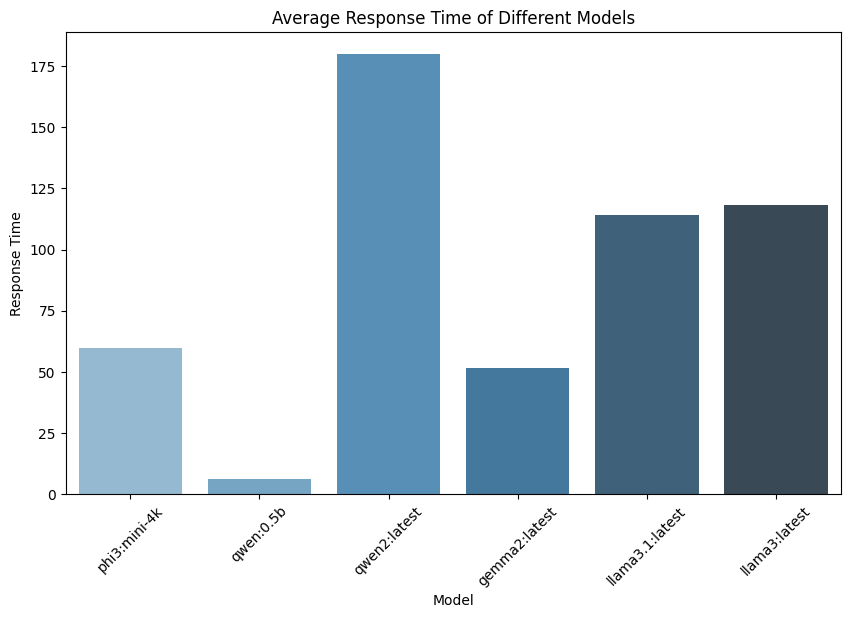

C:\Users\riley\AppData\Local\Temp\ipykernel_9876\3743126079.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Model', y='Response Time', data=df, palette="Set3")


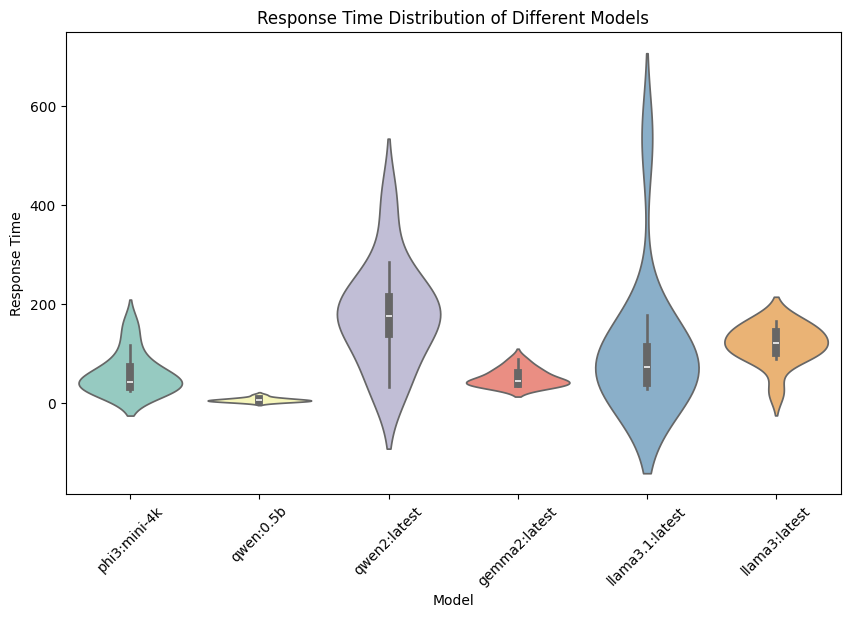

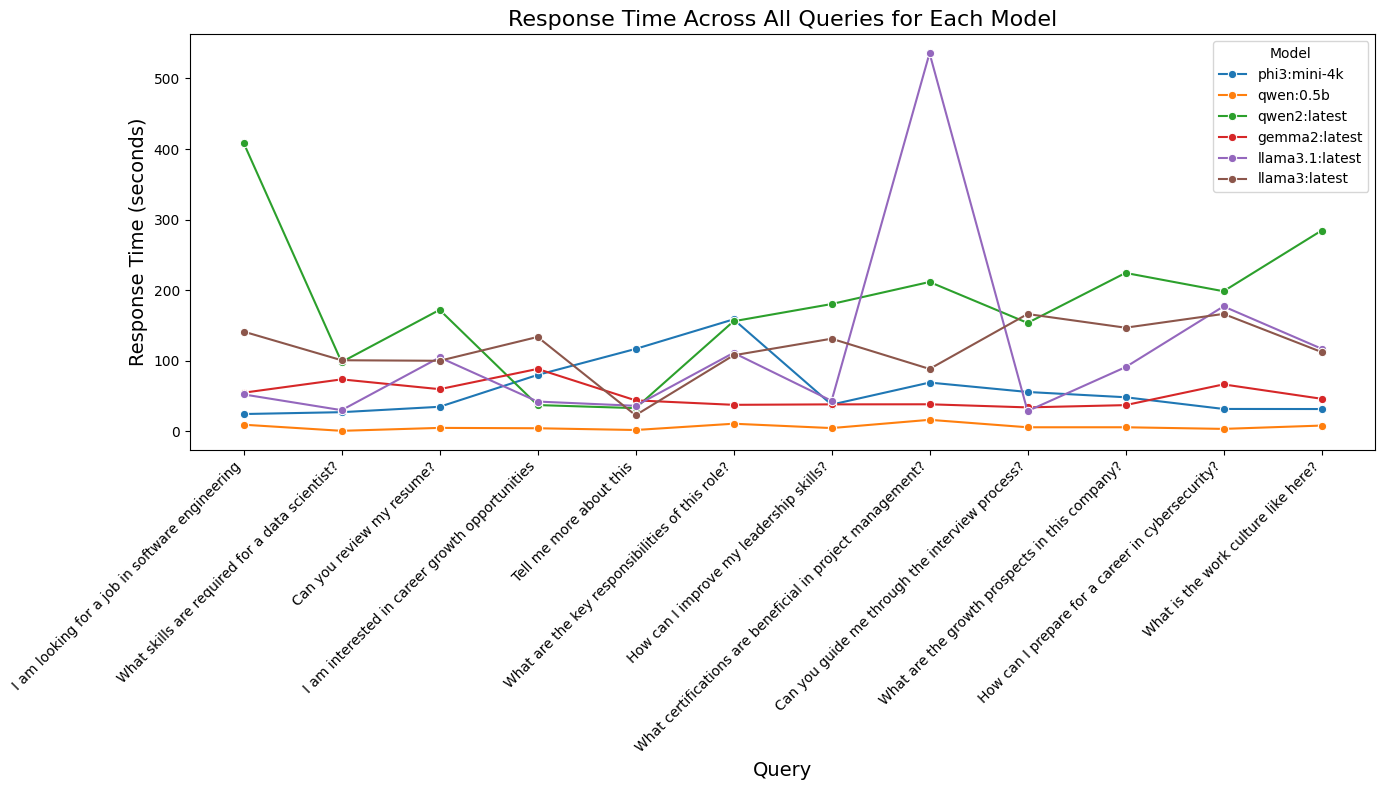

In [ ]:
df = pd.DataFrame(llm_results)
# 1. Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Response Time', data=df, palette="Blues_d", ci=None)
plt.title('Average Response Time of Different Models')
plt.xticks(rotation=45)
plt.show()

# 2. Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='Response Time', data=df, palette="Set3")
plt.title('Response Time Distribution of Different Models')
plt.xticks(rotation=45)
plt.show()

# 3. Line Plot (Showing average response time over queries)
plt.figure(figsize=(14, 8))

# Using seaborn's lineplot to plot response time across all queries
sns.lineplot(x='Query', y='Response Time', hue='Model', data=df, marker='o', palette="tab10")

# Adding title and labels
plt.title('Response Time Across All Queries for Each Model', fontsize=16)
plt.xlabel('Query', fontsize=14)
plt.ylabel('Response Time (seconds)', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjusting the layout to ensure labels and titles fit well
plt.tight_layout()

plt.show()



In [ ]:
df.to_csv('llm_analysis.csv')